In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.linalg import inv

# セットアップ

下記の3つが揃うことで、**尤度**を計算可能。
- データ：$X$, $y$
- パラメータ：$\beta$, $\sigma^2 (\text{or }h)$
- モデル：データとパラメータの関係

未知のパラメータは、標準的なOLSに対応している。

モデル：
$$\begin{aligned}
y_t &= \beta_0 + \beta_1 x_t + \epsilon_t,\\[1em]
&\quad \text{or}\\[1em]
y &= X \begin{bmatrix}\beta_0 \\ \beta_1 \end{bmatrix} + \epsilon,\\[1em]
&\epsilon \sim N(0, \sigma^2I_N)
\end{aligned}$$

データ：
$$y, X$$

パラメータ：
$$\beta, \sigma^2$$

このデータでは、$\hat{β}=2.1$、すなわち真の値（$\beta = 2.0$）よりわずかに**大きくなる**。

# 尤度関数

$\epsilon \sim N(0, \sigma^2I_N)$より、データ$\{y,X\}$が与えられれば、パラメータ$\{\beta, \sigma\}$のjoint distribution、すなわち**パラメータの尤度**が計算可能。すなわち、
$$ \begin{aligned}
p(y|\beta, \sigma^2) &= \prod_{n=1}^N \left[ \frac{1}{\sqrt{2\pi }\sigma} \exp \left( -\frac{1}{2\sigma^2}\epsilon_n^2 \right) \right]\\
&= \prod_{n=1}^N \left[ \frac{1}{\sqrt{2\pi }\sigma} \exp \left( -\frac{1}{2\sigma^2}(y_n-X_n \beta)^2 \right) \right]\\
&= \left( \frac{1}{\sqrt{2\pi }\sigma} \right)^N \exp \left[-\frac{1}{2\sigma^2}\sum_{n=1}^{N} (y_n-X_n \beta)^2 \right] \\
&= \left( \frac{1}{2\pi\sigma^2} \right)^{N/2} \exp \left[ -\frac{1}{2\sigma^2}(y-X\beta)'(y-X\beta) \right].
\end{aligned} $$

ここで
$$(y-X\beta)'(y-X\beta)=SSE+(\beta-\hat{\beta})'X'X(\beta-\hat{\beta})$$
より、
$$p(y|\beta, \sigma^2)= \left( \frac{1}{2\pi\sigma^2} \right)^{N/2} \exp \left[ -\frac{1}{2\sigma^2}\left\{ SSE+(\beta-\hat{\beta})'X'X(\beta-\hat{\beta}) \right\} \right]$$
または、
$$p(y|\beta, h)= \left( \frac{h}{2\pi} \right)^{N/2} \exp \left[ -\frac{h}{2}\left\{ SSE+(\beta-\hat{\beta})'X'X(\beta-\hat{\beta}) \right\} \right] \tag{BEM 10.4 or Koop 3.3}, $$
$$p(y|\beta, h)= \left( \frac{1}{2\pi} \right)^{N/2} h^\frac{k}{2} \exp \left[ -\frac{h}{2}(\beta-\hat{\beta})'X'X(\beta-\hat{\beta}) \right] h^\frac{\nu}{2} \exp \left[ -\frac{h\nu}{2s^{-2}} \right] \tag{Koop 3.7}$$


# 事前分布

次に、パラメータ$\{\beta, h\}$について**prior**（事前分布）を当てはめる。ここでは、自然共役分布として、Normal-Gamma分布を考える。Normal-Gamma分布とは、…(def)。ここでは、以下の**Hyperparameter**を考える。

## Gamma分布


一般に、Gamma分布の密度関数は、パラメータ$\alpha$、$\beta$を用いて
$$\begin{aligned}
& p(h; \alpha, \beta) ={C_G}^{-1}  h^{\alpha - 1} \cdot e^\frac{-h}{\beta},\\
&\, \text{where }{C_G} = \beta^\alpha\Gamma(\alpha)
\end{aligned}$$
と表現される。

以下では、精度$h$が、$\underline{s}$（スケール）と$\underline{\nu}$（自由度）によって規定されるGamma分布に従うと考える。すなわち、通常のGamma分布との対応関係を、
$$ \alpha = {\underline{\nu}}/{2}, \, \beta = {2\underline{s}^{-2}}/{\underline{\nu}}$$
とする。この時、上の対応関係から、
$$ p(h; \underline{s}, \underline{\nu}) ={C_\gamma}^{-1} h^{\underline{\nu}-2/2} \cdot \exp\left[-\frac{1}{2} h \frac{\underline{\nu}}{\underline{s}^{-2}}\right]$$
$$ \begin{aligned}
\mathbb{E}[h] &= \alpha \beta = \frac{\underline{\nu}}{2}\frac{2\underline{s}^{-2}}{\underline{\nu}} = \underline{s}^{-2}\\
\text{Var}[h] &= \alpha \beta^2 = \frac{\underline{\nu}}{2}\left(\frac{2\underline{s}^{-2}}{\nu}\right)^2 = \frac{2\underline{s}^{-4}}{\underline{\nu}}
\end{aligned}$$
つまり、$\underline{s}$は精度$h$の期待値を調整、$\underline{\nu}$は分散を調整するパラメータである。

## 正規分布

$β$が$N(\overline{\mathbf{\beta}}, h^{-1}\overline{\mathbf{Q}})$に従う
$$ \begin{aligned}
p(\beta|h; \underline{\beta}, \underline{Q}) &= \frac{1}{2\pi^{\frac{1}{2}k}}|h^{-1}\underline{Q}|^{-\frac{1}{2}}\exp\left[ -\frac{1}{2}(\beta-\underline{\beta})'[h^{-1}\underline{Q}]^{-1}(\beta-\underline{\beta}) \right]\\
&= \frac{1}{2\pi^{\frac{1}{2}k}}\underbrace{ (h^{-k}|\underline{Q}|) }_{\text{行列式の性質}}^{-\frac{1}{2}}\exp\left[ -\frac{h}{2}(\beta-\underline{\beta})'\underline{Q}^{-1}(\beta-\underline{\beta}) \right]\\
&= \left( \frac{h}{2\pi} \right)^{\frac{1}{2}k} |\underline{Q}|^{-\frac{1}{2}}\exp\left[ -\frac{h}{2}(\beta-\underline{\beta})'\underline{Q}^{-1}(\beta-\underline{\beta}) \right]
\end{aligned} $$

# 事後分布

モデルの尤度と事前分布が与えられることで、ベイズの定理に基づき事後分布を計算することができる。

## 結合分布

$$ \boxed{\begin{alignedat}{3}
p(y|\beta, h)&= \left( \frac{h}{2\pi} \right)^{N/2} \exp \left[ -\frac{h}{2}\left\{SSE+(\beta-\hat{\beta})'X'X(\beta-\hat{\beta}) \right\} \right] && \quad \dots \text{尤度}\\
p(h; \underline{s}, \underline{\nu}) &={C_\gamma}^{-1} h^{\underline{\nu}-2/2} \cdot \exp\left[-\frac{1}{2} h \frac{\underline{\nu}}{\underline{s}^{-2}}\right]  && \quad \dots \text{事前分布（Gamma部分）}\\
p(\beta|h,\underline{\beta}, \underline{Q}) &=\left( \frac{h}{2\pi} \right)^{\frac{1}{2}k} |\underline{Q}|^{-\frac{1}{2}}\exp\left[ -\frac{h}{2}(\beta-\underline{\beta})'\underline{Q}^{-1}(\beta-\underline{\beta}) \right]  && \quad \dots \text{事前分布（正規分布部分）}
\end{alignedat}} $$

よって、
$$ \begin{aligned}
p(\beta, h |y) &\propto \underbrace{ p(\beta | h; \underline{\beta},\underline{Q})p(h; \underline{s}, \underline{\nu}) }_{=p(\beta, h; \underline{\beta},\underline{Q}, \underline{s}, \underline{\nu})} \times p(y|\beta, h)\\
&=  \left( \frac{h}{2\pi} \right)^{\frac{1}{2}k} |\underline{Q}|^{-\frac{1}{2}}\exp\left[ -\frac{h}{2}(\beta-\underline{\beta})'\underline{Q}^{-1}(\beta-\underline{\beta}) \right]\\
&\quad \times {C_\gamma}^{-1} h^{\underline{\nu}-2/2} \cdot \exp\left[-\frac{h}{2} \frac{\underline{\nu}}{\underline{s}^{-2}}\right] \\
&\quad \times \left( \frac{h}{2\pi} \right)^{N/2} \exp \left[ -\frac{h}{2}\left\{ SSE+(\beta-\hat{\beta})'X'X(\beta-\hat{\beta}) \right\} \right]\\
& \propto h^{\frac{k+\underline{\nu}-2+N}{2}} \exp \left[ -\frac{h}{2} \left\{\underline{\nu}\underline{s}^{2}+SSE+(\beta-\underline{\beta})'\underline{Q}^{-1}(\beta-\underline{\beta})+(\beta-\hat{\beta})'X'X(\beta-\hat{\beta})\right\} \right].
\end{aligned} $$

後述の書き換えを用いると、
$$
\boxed{\begin{aligned}
p(\beta,h\mid y) \propto h^{\frac{k+\bar{\nu}-2}{2}} \exp\Bigg[
-\frac{h}{2}\Big\{ &\underline{\nu}\underline{s}^{2}+SSE +(\beta-\bar{\beta})'\bar{Q}^{-1}(\beta-\bar{\beta})\\ &
+(\underline{\beta}-\bar{\beta})'\underline{Q}^{-1}(\underline{\beta}-\bar{\beta}) +(\hat{\beta}-\bar{\beta})'X'X(\hat{\beta}-\bar{\beta})
\Big\} \Bigg],
\end{aligned}}
$$
$$ \begin{aligned}
&\bar{Q} = (\underline{Q}^{-1}+X'X)^{-1},\\
&\bar{\beta} = \bar{Q}(\underline{Q}^{-1}\underline{\beta}+X'X\hat{\beta}), \\
&\bar{\nu} = \underline{\nu}+N \quad (\text{Koop 2.29}).
\end{aligned}$$

## $\beta$の条件つき事後分布

$p(\beta,h|y)$に注目すると、$h$を定数項として考えた場合、$\beta$に依存するのは$\exp$内の第3項のみである。すなわち、
$$p(\beta, h|y)\propto \exp \left[-\frac{1}{2}(\beta-\bar{\beta})'[h^{-1}\bar{Q}]^{-1}(\beta-\bar{\beta})\right].$$
これは、正規分布のカーネル。従って、
$$\boxed{
    \begin{aligned}\beta|h,y \sim N(\bar{\beta},h^{-1}\bar{Q}),\end{aligned}\\[1em]
    \left.\begin{aligned}\bar{Q} &= (\underline{Q}^{-1}+X'X)^{-1},\\
    \bar{\beta} &= \bar{Q}(\underline{Q}^{-1}\underline{\beta}+X'X\hat{\beta})
    \end{aligned}\right\}
\quad (\text{再掲})}$$



Interpretation:
- OLS推定量との対応関係は、$\bar{\beta} ⇔\underline{\beta}$、$(X'X)^{-1} ⇔\underline{Q}$.
\
$$ \text{OLS:} \quad \text{Var}[b|X] = \sigma^2(X'X)^{-1} \tag{Greene 4-15}$$

- $\bar{\beta}$は、prior$\underline{\beta}$と最尤推定値$\hat{\beta}$の加重平均で決まる。ウエイトは、$\underline{Q}$（priorのばらつきの**逆数**;ばらついていると小さい）と$X'X$（データの情報量；大きいと大きい）。

## $h$の事後分布

$h$の事後分布は、以下の通り、結合分布の$\beta$を周辺化することで与えられる。
$$p(h|y) = \int p(\beta,h|y) d\beta$$

再び$p(\beta,h|y)$に注目すると、$\beta$に依存するのは$\exp$内の第3項のみである。ここで、第3項以外をまとめて
$$ \bar{\nu}\bar{s}^2 \equiv \underline{\nu}\underline{s}^{2}+SSE+(\underline{\beta}-\bar{\beta})'\underline{Q}^{-1}(\underline{\beta}-\bar{\beta}) +(\hat{\beta}-\bar{\beta})'X'X(\hat{\beta}-\bar{\beta})$$
とすると、
$$\begin{aligned}
p(h|y) &\propto \int p(\beta,h|y) d\beta\\
&=  h^{\frac{k+\underline{\nu}-2+N}{2}} \exp\left[-\frac{h}{2}\bar{\nu}\bar{s}^2\right] \int \exp \left[  -\frac{1}{2} (\beta-\bar{\beta})'h\bar{Q}^{-1}(\beta-\bar{\beta})\right]d\beta.
\end{aligned}$$

Integral内は正規分布の密度関数を含むことから、
$$ \int \exp \left[-\frac{1}{2} (\beta-\bar{\beta})'h\bar{Q}^{-1}(\beta-\bar{\beta})\right] d\beta=(2\pi)^{k/2}|h\bar{Q}^{-1}|^{-1/2}=(2\pi)^{k/2}h^{-k/2}|\bar{Q}^{-1}|^{-1/2}$$
と解ける。従って、
$$
\begin{aligned}
p(h\mid y) &\propto h^{\frac{k+\bar{\nu}-2}{2}} \exp\left[-\frac{h}{2}\bar{\nu}\bar{s}^2\right] (2\pi)^{k/2}h^{-k/2}|\bar{Q}^{-1}|^{-1/2}\\
&= h^{\frac{\bar{\nu}-2}{2}}\exp\left[-\frac{h}{2}\bar{\nu}\bar{s}^2\right] (2\pi)^{k/2}|\bar{Q}|^{1/2}\\
&\propto h^{\frac{\bar{\nu}-2}{2}}\exp\left[-\frac{h}{2}\bar{\nu}\bar{s}^2\right]
\end{aligned}
$$

$$\beta, h|y \sim NG(\bar{\beta}, \bar{Q}, \bar{s},\bar{\nu}),$$

In [ ]:
def calculate_bayesian_analytical_solution(y, X, beta_prior, Q_prior, nu_prior, s2_prior):
    n = X.shape[0]  # Number of observations
    XTX = X.T @ X
    XTy = X.T @ y
    Q_posterior = XTX + Q_prior
    beta_posterior = inv(Q_posterior) @ (XTy + Q_prior @ beta_prior)
    nu_posterior = nu_prior + n

    term1 = nu_prior * s2_prior
    term2 = y.T @ y
    term3 = beta_prior.T @ Q_prior @ beta_prior
    term4 = beta_posterior.T @ Q_posterior @ beta_posterior

    nu_s2_posterior_sum = term1 + term2 + term3 - term4
    s2_posterior = nu_s2_posterior_sum[0, 0] / nu_posterior # Extract scalar from (1,1) array

    return beta_posterior, Q_posterior, nu_posterior, s2_posterior

# 数値例

データ：
$$\mathbf{x} = \begin{pmatrix} -2 \\ -1 \\ 0 \\ 1 \\ 2 \end{pmatrix},
\quad
\mathbf{y} = \begin{pmatrix} -3.0 \\ -1.5 \\ 1.5 \\ 2.5 \\ 5.5 \end{pmatrix}$$
デザイン行列：
$$\mathbf{X} = \begin{pmatrix}
1 & -2 \\
1 & -1 \\
1 & 0 \\
1 & 1 \\
1 & 2
\end{pmatrix}$$

In [ ]:
### データ生成
x_val = np.array([-2, -1, 0, 1, 2])
y_val = np.array([-3.0, -1.5, 1.5, 2.5, 5.5])
n = len(x_val) # サンプルサイズ T=5
X = np.column_stack((np.ones(n), x_val))
y = y_val.reshape(-1, 1)
beta_true = np.array([[1.0], [2.0]])
k = X.shape[1] # パラメータ数 k=2 (beta0, beta1)

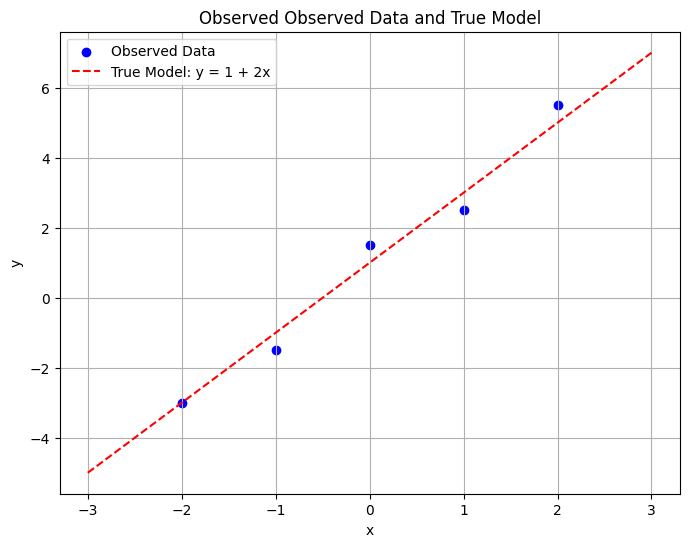

In [ ]:
### プロット
x_model = np.linspace(min(x_val) - 1, max(x_val) + 1, 100)
y_true_model = 1 + 2 * x_model

plt.figure(figsize=(8, 6))
plt.scatter(x_val, y_val, label='Observed Data', color='blue')
plt.plot(x_model, y_true_model, label='True Model: y = 1 + 2x', color='red', linestyle='--')
plt.gca().set(title='Observed Observed Data and True Model', xlabel = 'x', ylabel = 'y')
plt.grid(True)
plt.legend()
plt.show()

## OLS推定量の計算

$$\begin{aligned}
\hat{\beta}&=(X'X)^{-1}X'y\\
SSE &= (y - X\hat{\beta})'(y - X\hat{\beta})\\
\nu &= N-k \quad \quad \text{Koop (2.3)}\\
s &= \frac{SSE}{\nu}
\end{aligned}$$

In [ ]:
XTX = X.T @ X
XTy = X.T @ y
beta_hat = inv(XTX) @ XTy
SSE = np.sum((y - X @ beta_hat)**2)
s2_ols = SSE / (n - k)
print("OLS betahat:\n", beta_hat)

OLS betahat:
 [[1. ]
 [2.1]]


## 尤度関数 数値例

In [ ]:
### 尤度関数
def calculate_likelihood(beta, h, y, X):
    N = len(y)
    constant_part = (h / (2 * np.pi))**(N / 2) # (h/2pi)^(N\2)
    residual = y - X @ beta # y - Xbeta
    sse = residual.T @ residual
    exponential_part = np.exp(- h/2 * sse)
    return (constant_part * exponential_part)[0, 0]

異なる$\beta_1$と$h$について尤度関数をplotすると、
- $\beta_1$が真の値（$2$）に近いほど尤度が大きく、
- その山は、精度が高い（=分散が低い）ほど高い

ことがわかる。

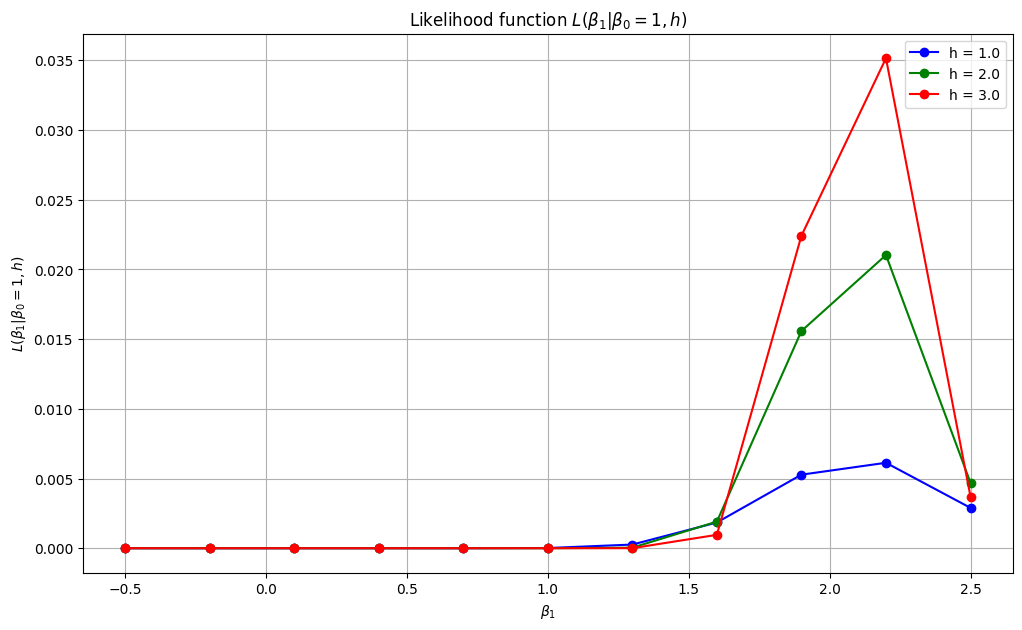

In [ ]:
### 尤度関数プロット
beta1_range = np.linspace(-0.5, 2.5, 11)

h_values = [1.0, 2.0, 3.0]
colors = ['blue', 'green', 'red']
labels = [f'h = {h}' for h in h_values]

plt.figure(figsize=(12, 7))

for i, h_val in enumerate(h_values):
    kernel_values = []
    for beta1_val in beta1_range:
        beta_vector = np.array([[beta_true[0][0]], [beta1_val]])
        kernel_val = calculate_likelihood(beta_vector, h_val, y, X)
        kernel_values.append(kernel_val)

    plt.plot(beta1_range, kernel_values, marker='o', linestyle='-', color=colors[i], label=labels[i])

plt.gca().set(title=r'Likelihood function $L(\beta_1|\beta_0 =1, h)$', xlabel=r'$\beta_1$', ylabel=r'$L(\beta_1|\beta_0 =1, h)$')
plt.grid(True)
plt.legend()
plt.show()

## Gamma分布 数値例

$$
\begin{aligned}
\underline{\beta} &= \begin{pmatrix}0.0\\0.0\end{pmatrix},\\
\underline{Q} &= \begin{bmatrix}1 & 0\\ 0 & 1\end{bmatrix},\\
\underline{\nu} &= \quad 2.0,\\
\underline{s}^2 &= \quad 0.5.
\end{aligned}
$$

In [ ]:
# 3. 事前分布パラメータ (Informative Prior: Normal-Gamma)
beta_prior = np.array([[0.0], [0.0]]) # 事前平均: beta = [0, 0]'
Q_prior = np.eye(k) * 1.0             # 事前精度行列 Q (確信度): Q = diag(1, 1)
nu_prior = 2.0                        # 事前自由度/スケール
s2_prior = 0.5                        # 事前分散の目安 E[sigma^2] = 0.5 * 2 / (2-2) -> E[h] = nu_prior / (nu_prior*s2_prior) = 2/1 = 2 (sigma^2=0.5)

In [ ]:
def calculate_h_prior_kernel(h_param, nu, s2):
    alpha = nu / 2.0
    beta = (nu * s2) / 2.0
    if h_param <= 0: return 0.0 # hが0以下の場合はカーネル値は0
    return (h_param**(alpha - 1)) * np.exp(-beta * h_param)

/tmp/ipython-input-1028312694.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


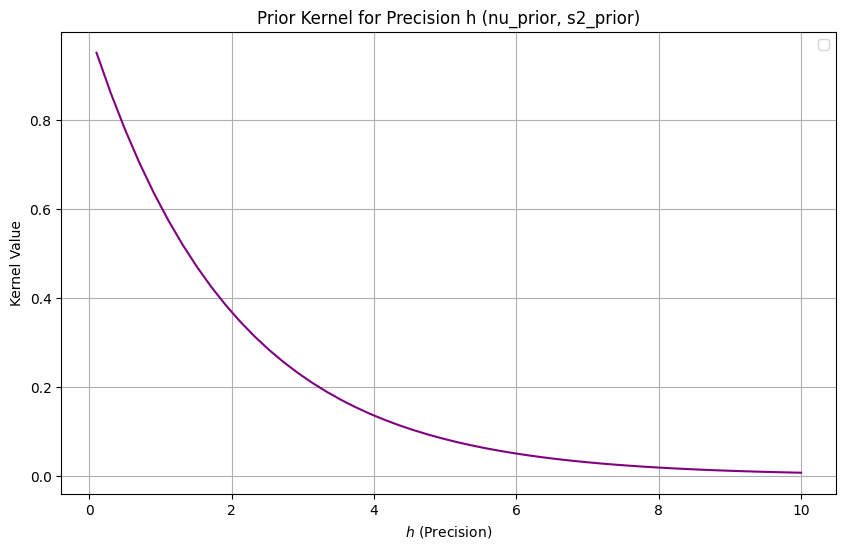

In [ ]:
h_range = np.linspace(0.1, 10.0, 50)

# 計算結果を保存するリスト
kernel_values_h = []

for h_point in h_range:
    kernel_val = calculate_h_prior_kernel(h_point, nu_prior, s2_prior)
    kernel_values_h.append(kernel_val)

# 結果をプロット
plt.figure(figsize=(10, 6))
plt.plot(h_range, kernel_values_h, linestyle='-', color='purple')
plt.gca().set(title=r'Prior Kernel for Precision h (nu_prior, s2_prior)', xlabel=r'$h$ (Precision)', ylabel='Kernel Value')
plt.grid(True)
plt.legend()
plt.show()

## 正規分布 数値例

In [ ]:
def calculate_conditional_posterior_beta_kernel(beta, beta_bar, h, Q_bar):
    k = len(beta)
    deviation = beta - beta_bar
    quadratic_form = deviation.T @ Q_bar @ deviation
    return (h**(k/2)) * np.exp(-0.5 * h * quadratic_form[0, 0])

prior($\beta, Q$)を固定したうえで、異なる$h$に条件づけて、$\beta$の条件付き尤度を計算。$h$ （precision）が大きいほど、prior（$\beta = 0$）から近い（離れた）値に大きい（小さい）尤度を割り当てる一方、precisionが小さい場合はflat。

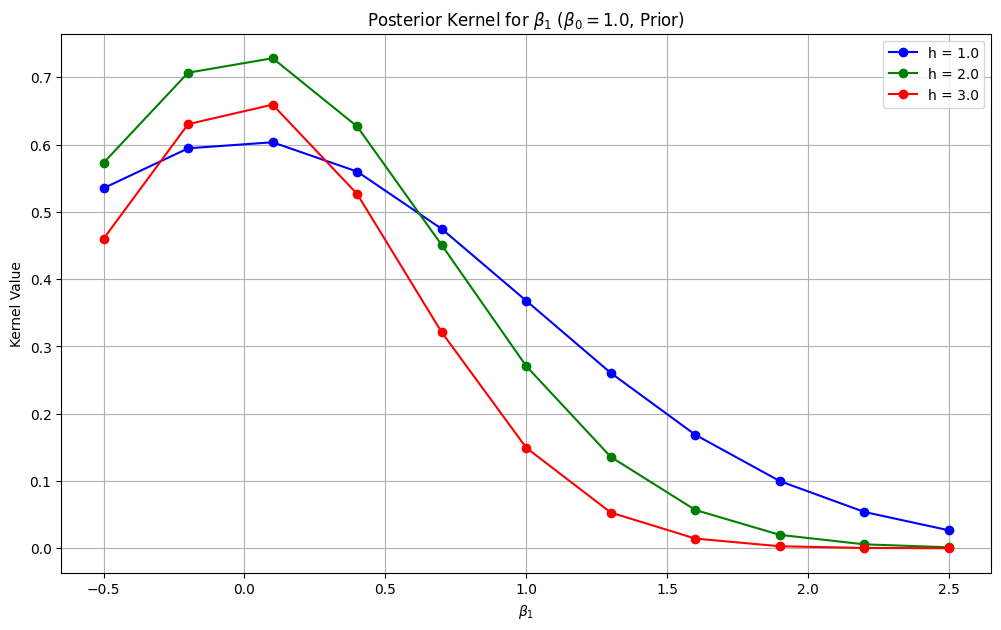

In [ ]:
beta1_range = np.linspace(-0.5, 2.5, 11)
beta0_fixed = 1.0

h_values = [1.0, 2.0, 3.0]
colors = ['blue', 'green', 'red']
labels = [f'h = {h}' for h in h_values]

plt.figure(figsize=(12, 7))

for i, h_val in enumerate(h_values):
    kernel_values = []
    for beta1_val in beta1_range:
        beta_vector = np.array([[beta0_fixed], [beta1_val]])
        kernel_val = calculate_conditional_posterior_beta_kernel(beta_vector, beta_prior, h_val, Q_prior)
        kernel_values.append(kernel_val)

    plt.plot(beta1_range, kernel_values, marker='o', linestyle='-', color=colors[i], label=labels[i])

plt.gca().set(title=r'Posterior Kernel for $\beta_1$ ($\beta_0 = 1.0$, Prior)', xlabel=r'$\beta_1$', ylabel='Kernel Value')
plt.grid(True)
plt.legend()
plt.show()

- hにconditionづければ、betaのposteriorも正規分布…"自然共役"

## 解法

### 解析解

In [ ]:
# Call the function with existing data and prior parameters
beta_post_analytical, Q_post_analytical, nu_post_analytical, s2_post_analytical = \
    calculate_bayesian_analytical_solution(y, X, beta_prior, Q_prior, nu_prior, s2_prior)

print("Analytical Posterior Mean for Beta:\n", beta_post_analytical)
print("\nAnalytical Posterior Precision Matrix for Beta (Q_posterior):\n", Q_post_analytical)
print("\nAnalytical Posterior Degrees of Freedom (nu_posterior):", nu_post_analytical)
print("\nAnalytical Posterior Scale for Sigma^2 (s2_posterior):", s2_post_analytical)

Analytical Posterior Mean for Beta:
 [[0.83333333]
 [1.90909091]]

Analytical Posterior Precision Matrix for Beta (Q_posterior):
 [[ 6.  0.]
 [ 0. 11.]]

Analytical Posterior Degrees of Freedom (nu_posterior): 7.0

Analytical Posterior Scale for Sigma^2 (s2_posterior): 0.9632034632034632


Marginal Posterior t-distribution parameters for beta_1:
  Degrees of Freedom (df): 7.00
  Location (mean): 1.9091
  Scale (standard deviation): 0.3501


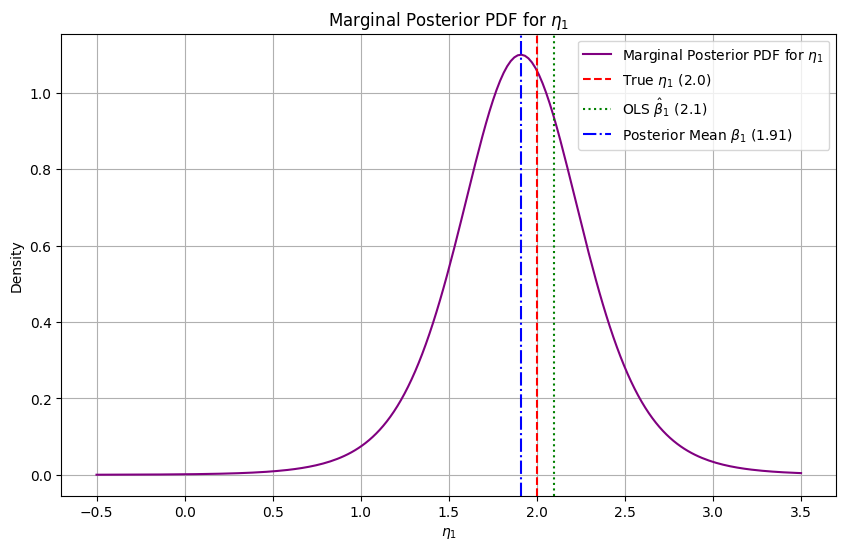

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parameters for the marginal posterior t-distribution of beta_1
df_beta1 = nu_post_analytical
loc_beta1 = beta_post_analytical[1,0]

# Calculate the inverse of Q_post_analytical
inv_Q_post_analytical = np.linalg.inv(Q_post_analytical)

# The variance of the marginal t-distribution for beta_1 is:
# Var(beta_1) = (nu_post_analytical / (nu_post_analytical - 2)) * s2_post_analytical * inv(Q_post_analytical)[1,1]
# This formula is valid for nu_post_analytical > 2.
if nu_post_analytical > 2:
    variance_beta1 = (nu_post_analytical / (nu_post_analytical - 2)) * s2_post_analytical * inv_Q_post_analytical[1,1]
else:
    # If degrees of freedom are not > 2, variance is undefined.
    # For plotting purposes, we might use a proxy or handle this case specifically.
    # In this context, nu_post_analytical is 7.0, so this branch won't be taken.
    print("Warning: Variance for t-distribution is undefined for df <= 2.")
    variance_beta1 = s2_post_analytical * inv_Q_post_analytical[1,1] # Using a proxy scale

# The 'scale' parameter for scipy.stats.t.pdf is the standard deviation.
scale_beta1_std = np.sqrt(variance_beta1)

print(f"Marginal Posterior t-distribution parameters for beta_1:")
print(f"  Degrees of Freedom (df): {df_beta1:.2f}")
print(f"  Location (mean): {loc_beta1:.4f}")
print(f"  Scale (standard deviation): {scale_beta1_std:.4f}")

# Create a range of values for beta_1 to plot the PDF
beta1_range = np.linspace(-0.5, 3.5, 200)

# Calculate PDF values using scipy.stats.t
posterior_pdf_values = t.pdf(beta1_range, df=df_beta1, loc=loc_beta1, scale=scale_beta1_std)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(beta1_range, posterior_pdf_values, color='purple', linestyle='-', label=r'Marginal Posterior PDF for $\eta_1$')
plt.axvline(x=beta_true[1][0], color='red', linestyle='--', label=r'True $\eta_1$ ({:.1f})'.format(beta_true[1][0]))
plt.axvline(x=beta_hat[1][0], color='green', linestyle=':', label=r'OLS $\hat{{\beta}}_1$ ({:.1f})'.format(beta_hat[1][0]))
plt.axvline(x=loc_beta1, color='blue', linestyle='-.', label=r'Posterior Mean $\beta_1$ ({:.2f})'.format(loc_beta1))
plt.gca().set(title=r'Marginal Posterior PDF for $\eta_1$', xlabel=r'$\eta_1$', ylabel='Density')
plt.grid(True)
plt.legend()
plt.show()

### シミュレーション

In [ ]:
beta1_grid = np.linspace(-1, 3, 100)
h_grid = np.linspace(0.1, 10, 100)
beta1_mesh, h_mesh = np.meshgrid(beta1_grid, h_grid)

print("beta1_grid shape:", beta1_grid.shape)
print("h_grid shape:", h_grid.shape)
print("beta1_mesh shape:", beta1_mesh.shape)
print("h_mesh shape:", h_mesh.shape)

beta1_grid shape: (100,)
h_grid shape: (100,)
beta1_mesh shape: (100, 100)
h_mesh shape: (100, 100)


In [ ]:
likelihood_values = np.zeros(beta1_mesh.shape)

for i in range(beta1_mesh.shape[0]):
    for j in range(beta1_mesh.shape[1]):
        beta1_val = beta1_mesh[i, j]
        h_val = h_mesh[i, j]
        beta_vector = np.array([[beta_true[0][0]], [beta1_val]])
        # Ensure h_val is positive for likelihood calculation
        if h_val > 0:
            likelihood_values[i, j] = calculate_likelihood(beta_vector, h_val, y, X)
        else:
            likelihood_values[i, j] = 0 # Likelihood is 0 if h is not positive

print("Likelihood values calculated. Shape:", likelihood_values.shape)

Likelihood values calculated. Shape: (100, 100)


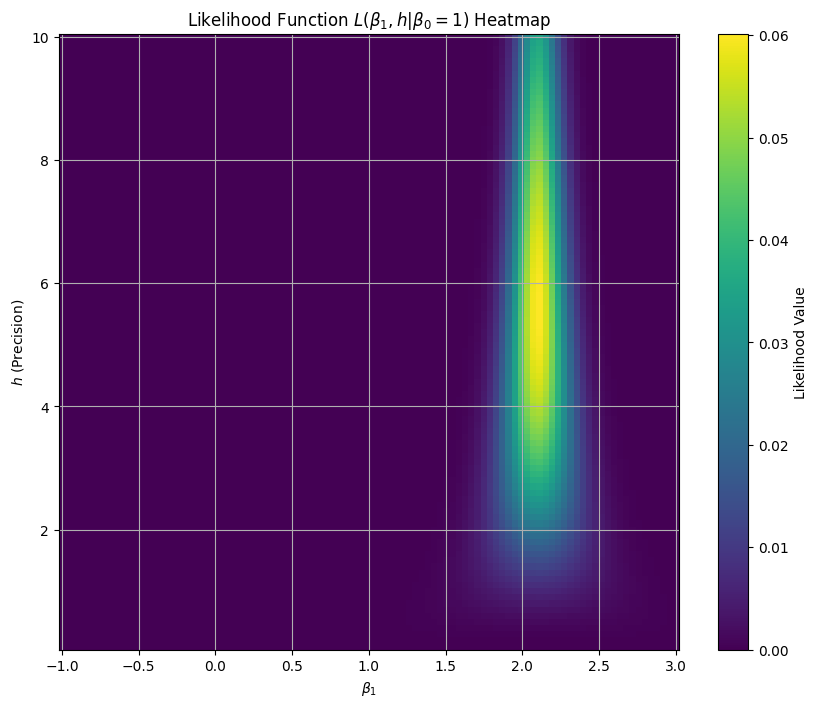

In [ ]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(beta1_mesh, h_mesh, likelihood_values, cmap='viridis')
plt.colorbar(label='Likelihood Value')
plt.gca().set(title = r'Likelihood Function $L(\beta_1, h | \beta_0 = 1)$ Heatmap', xlabel = r'$\beta_1$', ylabel = r'$h$ (Precision)')
plt.grid(True)
plt.show()

In [ ]:
prior_values = np.zeros(beta1_mesh.shape)

for i in range(beta1_mesh.shape[0]):
    for j in range(beta1_mesh.shape[1]):
        beta1_val = beta1_mesh[i, j]
        h_val = h_mesh[i, j]

        beta_vector = np.array([[beta_prior[0][0]], [beta1_val]])

        if h_val > 0:
            # Calculate Gamma prior for h
            h_prior_kernel = calculate_h_prior_kernel(h_val, nu_prior, s2_prior)
            # Calculate Normal prior for beta conditional on h
            beta_conditional_prior_kernel = calculate_conditional_posterior_beta_kernel(beta_vector, beta_prior, h_val, Q_prior)

            prior_values[i, j] = h_prior_kernel * beta_conditional_prior_kernel
        else:
            prior_values[i, j] = 0 # Prior is 0 if h is not positive

print("Prior values calculated. Shape:", prior_values.shape)

100

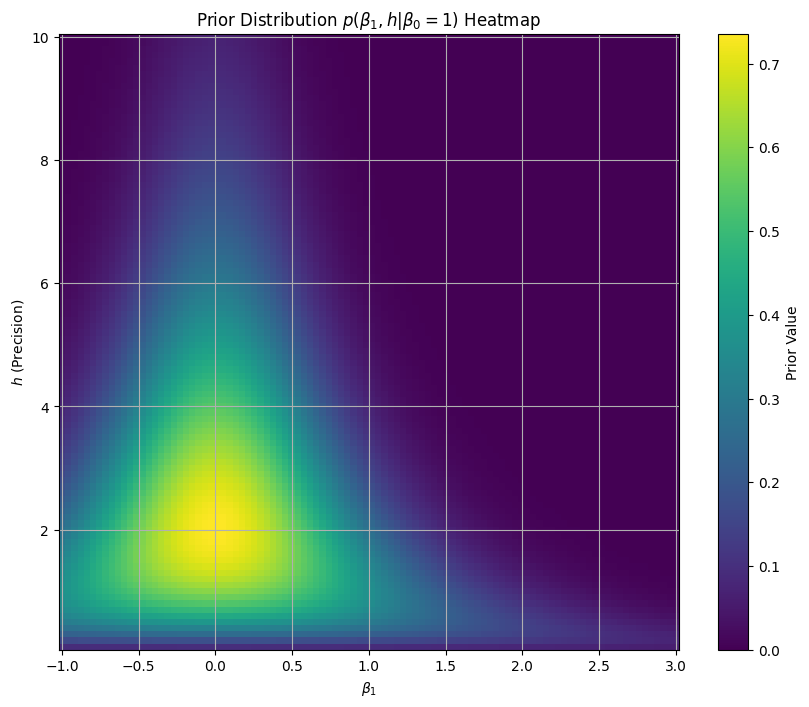

In [ ]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(beta1_mesh, h_mesh, prior_values, cmap='viridis')
plt.colorbar(label='Prior Value')
plt.gca().set(title = r'Prior Distribution $p(\beta_1, h | \beta_0 = 1)$ Heatmap', xlabel = r'$\beta_1$', ylabel = r'$h$ (Precision)')
plt.grid(True)
plt.show()

In [ ]:
posterior_values_unnormalized = likelihood_values * prior_values

sum_posterior_values = np.sum(posterior_values_unnormalized)
if sum_posterior_values > 0:
    posterior_values = posterior_values_unnormalized / sum_posterior_values
else:
    posterior_values = np.zeros_like(posterior_values_unnormalized)

print("Posterior values calculated. Shape:", posterior_values.shape)
print("Sum of posterior values (after normalization):", np.sum(posterior_values))

Posterior values calculated. Shape: (100, 100)
Sum of posterior values (after normalization): 0.9999999999999999


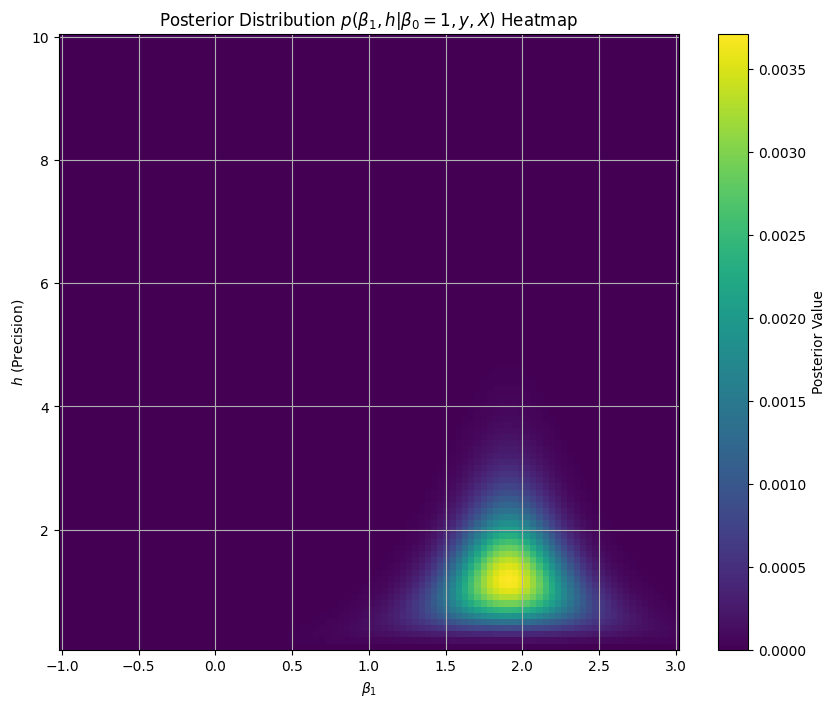

In [ ]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(beta1_mesh, h_mesh, posterior_values, cmap='viridis')
plt.colorbar(label='Posterior Value')
plt.gca().set(title = r'Posterior Distribution $p(\beta_1, h | \beta_0 = 1, y, X)$ Heatmap', xlabel = r'$\beta_1$', ylabel = r'$h$ (Precision)')
plt.grid(True)
plt.show()

### Gibbs Sampling

ここでは、条件付き事後分布のパラメータを$\{\tilde{\beta},\tilde{Q},\tilde{\nu},\tilde{s}\}$と書く。
$\beta$の条件付き事後分布は、解析解で導出済み。すなわち、

$$ \boxed{\beta|h \sim N(\tilde{\beta},h^{-1}\tilde Q),}$$
$$\begin{aligned}
\tilde{Q} &= \bar{Q} = (\underline{Q}^{-1}+X'X)^{-1},\\
\tilde{\beta} &= \bar{\beta}= \bar{Q}(\underline{Q}^{-1}\underline{\beta}+X'X\hat{\beta}).
\end{aligned}$$

一方、$h$については$\beta$を定数項として扱うことで、下記のパラメータに従うGamma分布として定義できる:
$$ \boxed{h|\beta \sim \gamma(\tilde{s}^{-2},\tilde{\nu}),}$$
\
$$\begin{aligned}
\tilde{\nu}&=\underline{\nu}+N,\\[1em]
\tilde{\nu}\tilde{s}^2 &= \underbrace{ \underline{\nu}\underline{s}^{2}+SSE+(\underline{\beta}-\bar{\beta})'\underline{Q}^{-1}(\underline{\beta}-\bar{\beta})  }_{=\bar{\nu} \bar{s}^2}+(\hat{\beta}-\bar{\beta})'X'X(\hat{\beta}-\bar{\beta})\\
&= \bar{\nu} \bar{s}^2+(\hat{\beta}-\bar{\beta})'X'X(\hat{\beta}-\bar{\beta}).
\end{aligned}$$


In [ ]:
import numpy as np
from scipy.stats import gamma
from numpy.linalg import inv # Ensure inv is imported if not already

beta_tilde = beta_post_analytical
Q_tilde = Q_post_analytical
nu_tilde = nu_post_analytical
s2_tilde = s2_post_analytical # Corresponds to bar_s^2 from analytical solution

h_init = 1.0 # Initial value for h

sampled_betas = []
sampled_hs = []

n_samples = 1000

current_h = h_init # Initialize current h for the loop

for i in range(n_samples):
    # 1. Draw beta from its conditional posterior distribution: beta | h, y ~ N(beta_tilde, h^-1 * Q_tilde)
    cov_beta = (1 / current_h) * Q_tilde
    drawn_beta = np.random.multivariate_normal(beta_tilde.flatten(), cov_beta).reshape(-1, 1)
    sampled_betas.append(drawn_beta)

    # 2. Draw h from its conditional posterior distribution: h | beta, y ~ Gamma(shape, scale)
    shape_h = (nu_tilde + k) / 2 # Using k for the dimension of beta (number of parameters)
    quadratic_form_h = (drawn_beta - beta_tilde).T @ inv(Q_tilde) @ (drawn_beta - beta_tilde)

    rate_h = (nu_tilde * s2_tilde + quadratic_form_h[0, 0]) / 2
    scale_h = 1 / rate_h

    current_h = gamma.rvs(a=shape_h, scale=scale_h)
    sampled_hs.append(current_h)

# print only a few samples to avoid excessive output
print("First 5 sampled betas:\n", sampled_betas[:5])
print("\nLast 5 sampled betas:\n", sampled_betas[-5:])
print("\nFirst 5 sampled hs:\n", sampled_hs[:5])
print("\nLast 5 sampled hs:\n", sampled_hs[-5:])


First 5 sampled betas:
 [array([[ 1.31539663],
       [-2.66507155]]), array([[ 2.23005318],
       [-3.19206449]]), array([[ 1.92944644],
       [-0.12293736]]), array([[3.43584302],
       [4.77800744]]), array([[-0.14395923],
       [ 2.67664126]])]

Last 5 sampled betas:
 [array([[-0.01714713],
       [ 0.05548191]]), array([[0.8362754 ],
       [0.67700169]]), array([[-2.42864241],
       [ 1.76783405]]), array([[-3.29473627],
       [ 3.85480758]]), array([[ 2.26118404],
       [-2.22832227]])]

First 5 sampled hs:
 [np.float64(0.3481498615717204), np.float64(1.3581753510405918), np.float64(0.19591694584188715), np.float64(1.6560467743957095), np.float64(0.3514102083584823)]

Last 5 sampled hs:
 [np.float64(1.7014438616396381), np.float64(0.6407689570524013), np.float64(0.8517437294709679), np.float64(0.39905670373812085), np.float64(1.183668184250516)]


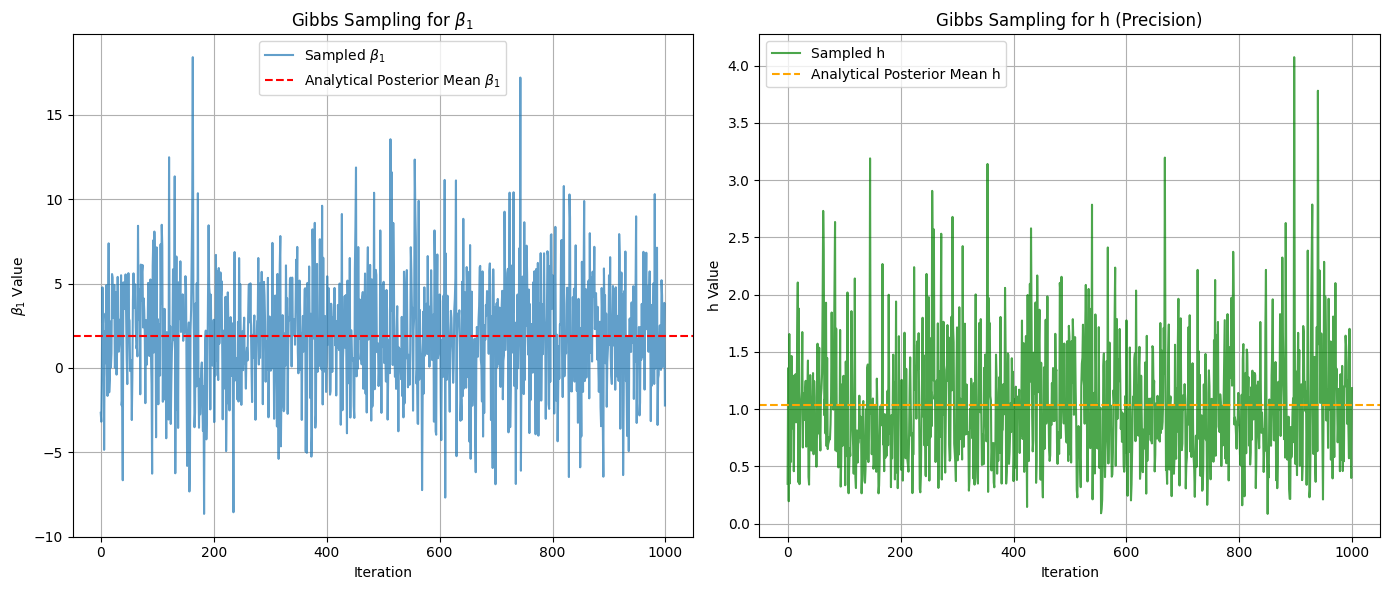

In [ ]:
import matplotlib.pyplot as plt

# Extract beta_1 values from sampled_betas
beta1_samples = [beta[1][0] for beta in sampled_betas]

# Create a range for the x-axis (number of samples)
iterations = range(n_samples)

plt.figure(figsize=(14, 6))

# Plot for beta_1
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.plot(iterations, beta1_samples, label=r'Sampled $\beta_1$', alpha=0.7)
plt.axhline(y=beta_post_analytical[1][0], color='red', linestyle='--', label=r'Analytical Posterior Mean $\beta_1$')
plt.title(r'Gibbs Sampling for $\beta_1$')
plt.xlabel('Iteration')
plt.ylabel(r'$\beta_1$ Value')
plt.grid(True)
plt.legend()

# Plot for h
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.plot(iterations, sampled_hs, label='Sampled h', alpha=0.7, color='green')
# Calculate analytical posterior mean for h
# E[h] = alpha * beta for Gamma distribution. Here, alpha = nu_tilde/2, beta = 2/(nu_tilde * s2_tilde) if scale is 1/beta
# So, E[h] = (nu_tilde/2) / ((nu_tilde * s2_tilde) / 2) = 1/s2_tilde
# However, the formula from the notes is E[h] = alpha * beta = (nu/2) * (2*s^-2 / nu) = s^-2
# Therefore, E[h] = 1/s2_tilde, using the s2_tilde as the s^2 from the notes for the posterior Gamma.
analytical_mean_h = 1.0 / s2_tilde if s2_tilde != 0 else np.nan # Avoid division by zero
plt.axhline(y=analytical_mean_h, color='orange', linestyle='--', label=r'Analytical Posterior Mean h')
plt.title('Gibbs Sampling for h (Precision)')
plt.xlabel('Iteration')
plt.ylabel('h Value')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 数学補足

## 1.

一般的に、
$$ \begin{aligned}
&(\beta-\beta_1)'V_1(\beta-\beta_1)+(\beta-\beta_2)'V_2(\beta-\beta_2) \\[1em]
=& \beta'V_1\beta - 2 \beta'V_1\beta_1+\beta_1'V_1\beta_1+\beta'V_2\beta - 2 \beta'V_2\beta_2+\beta_2'V_2\beta_2\\[1em]
=& \beta'(\underbrace{ V_1+V_2 }_{\equiv \bar{V}})\beta -2 \beta'(\underbrace{ V_1\beta_1+V_2\beta_2 }_{\equiv b})+\underbrace{ \beta_1'V_1\beta_1+\beta_2'V_2\beta_2 }_{\equiv C}\\
=&\beta' \bar{V} \beta-2\beta'b+C.
\end{aligned} $$
ここで、$b = \bar{V}\bar{\beta}$とおくと、
$$ \begin{aligned}
&\beta' \bar{V} \beta -2 \beta'\bar{V} \bar{\beta}+C\\[1em]
=&(\beta-\bar{\beta})'\bar{V}(\beta-\bar{\beta})+C-\bar{\beta}'\bar{V}\bar{\beta}'
\end{aligned} $$
さらに、
$$ \begin{aligned}
&(\beta_1-\bar{\beta})'V_1(\beta_1-\bar{\beta})+(\beta_2-\bar{\beta})'V_2(\beta_2-\bar{\beta})\\[1em]
=&\beta_1'V_1\beta_1+\beta_2'V_2\beta_2-2\bar{\beta}'(\underbrace{ V_1\beta_1+V_2\beta_2 }_{=b})+\bar{\beta}'(V_1+V_2)\bar{\beta}\\
=&\beta_1'V_1\beta_1+\beta_2'V_2\beta_2-2\underbrace{ \bar{\beta}'\bar{V}\bar{\beta} }_{=\bar{\beta}'b}+\bar{\beta}'\bar{V}\bar{\beta}\\
=&\beta_1'V_1\beta_1+\beta_2'V_2\beta_2-\bar{\beta}'\bar{V}\bar{\beta}\\[1em]
=&C-\bar{\beta}'\bar{V}\bar{\beta}.
\end{aligned} $$
よって、

$$(\beta-\beta_1)'V_1(\beta-\beta_1)+(\beta-\beta_2)'V_2(\beta-\beta_2)=(\beta-\bar{\beta})'\bar{V}(\beta-\bar{\beta})+(\beta_1-\bar{\beta})'V_1(\beta_1-\bar{\beta})+(\beta_2-\bar{\beta})'V_2(\beta_2-\bar{\beta}),$$
$$ \begin{aligned}
&\bar{V} = V_1+V_2,\\
&\bar{\beta} = \bar{V}^{-1}(V_1\beta_1+V_2\beta_2)
\end{aligned} $$


## 2. 尤度の計算（未）